In [1]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("data/post_grouped_1km_0714.csv")

# 상위 5행 출력
print(df.head())

   post_group  year     traffic  fence  eco  agri  water  1km_inner  count  \
0           0  2019  226.918601      1    0     0      0          1      0   
1           0  2020  222.766523      1    0     0      0          1      0   
2           0  2021  211.874653      1    0     0      0          1      0   
3           0  2022  260.202452      1    0     0      0          1      0   
4           0  2023  239.057815      1    0     0      0          1      0   

   avg_low_temp_springautumn  ...  avg_temp_winter  avg_wind_springautumn  \
0                      10.30  ...         5.400000                   2.32   
1                       9.86  ...         5.533333                   2.50   
2                      10.68  ...         5.233333                   2.48   
3                      10.62  ...         3.333333                   2.22   
4                      10.32  ...         5.233333                   2.52   

   avg_wind_summer  avg_wind_winter  max_snow_springautumn  max_snow

In [15]:
# groupby 로드킬 합계
counts = df.groupby("post_group")["count"].sum()

# 내림차순 정렬 후 상위 10개
top10 = counts.sort_values(ascending=False).head(10)

print(top10)
# DataFrame으로 변환
top10_df = counts.sort_values(ascending=False).head(10).reset_index()

print(top10_df)

post_group
3300    37
3250    37
2950    33
2500    31
3350    29
2600    25
3200    21
2650    20
3150    16
3400    16
Name: count, dtype: int64
   post_group  count
0        3300     37
1        3250     37
2        2950     33
3        2500     31
4        3350     29
5        2600     25
6        3200     21
7        2650     20
8        3150     16
9        3400     16


In [ ]:
import pandas as pd

# CSV 불러오기
df = pd.read_csv("data/post_grouped_1km_0714.csv")


# 컬럼명 확인
print(df.columns.tolist())

['post_group', 'year', 'traffic', 'fence', 'eco', 'agri', 'water', '1km_inner', 'count', 'avg_low_temp_springautumn', 'avg_low_temp_summer', 'avg_low_temp_winter', 'avg_temp_springautumn', 'avg_temp_summer', 'avg_temp_winter', 'avg_wind_springautumn', 'avg_wind_summer', 'avg_wind_winter', 'max_snow_springautumn', 'max_snow_summer', 'max_snow_winter', 'month_total_rain_springautumn', 'month_total_rain_summer', 'month_total_rain_winter']


발생 구간 데이터 shape: (90, 41)
count    90.000000
mean      5.222222
std       3.235261
min       3.000000
25%       3.000000
50%       4.000000
75%       6.750000
max      18.000000
Name: count, dtype: float64
🔎 RMSE: 0.5726497863247463
🔎 R² Score: 0.9729233944954129


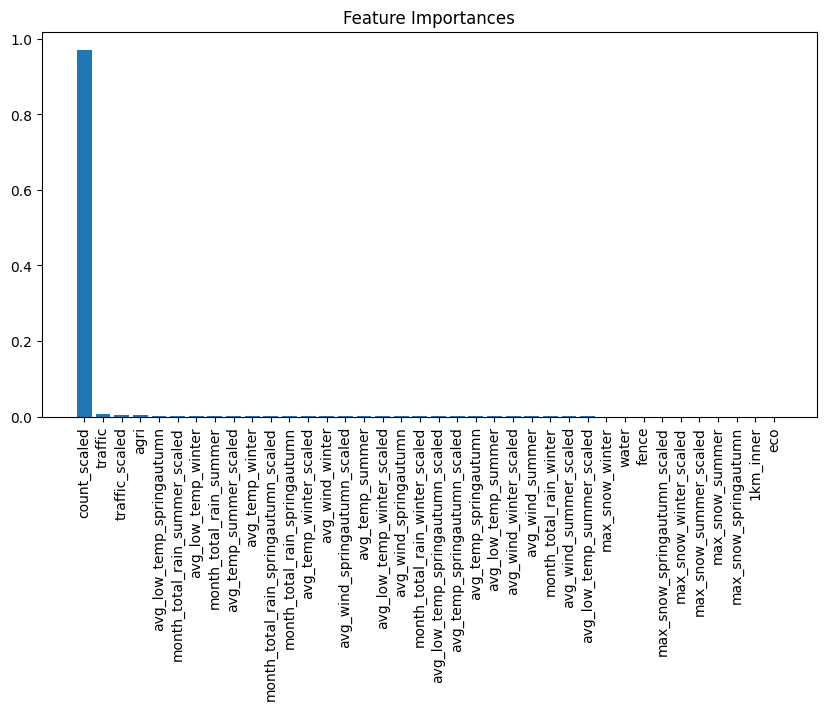

In [25]:
# --------------------------------------------
# 1. 라이브러리 import
# --------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------
# 2. 데이터 불러오기
# --------------------------------------------
df = pd.read_csv("data/post_1km_robust scaling_0714.csv")

# --------------------------------------------
# 3. count > 0 구간만 추출
# --------------------------------------------
df_nonzero = df[df["count"] > 0]

print("발생 구간 데이터 shape:", df_nonzero.shape)
print(df_nonzero["count"].describe())

# --------------------------------------------
# 4. Feature / Target 분리
# --------------------------------------------
y = df_nonzero["count"]
X = df_nonzero.drop(columns=["count", "post_group", "year"])

# --------------------------------------------
# 5. train-test split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------------
# 6. Random Forest 학습
# --------------------------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --------------------------------------------
# 7. 예측 및 평가
# --------------------------------------------
y_pred = model.predict(X_test)

# 구버전 호환 - RMSE 계산
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("🔎 RMSE:", rmse)
print("🔎 R² Score:", r2)

# --------------------------------------------
# 8. Feature Importance 시각화
# --------------------------------------------
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.show()

발생 구간 데이터 shape: (90, 41)
count    90.000000
mean      5.222222
std       3.235261
min       3.000000
25%       3.000000
50%       4.000000
75%       6.750000
max      18.000000
Name: count, dtype: float64
Feature shape: (90, 37)
🔎 Fold별 RMSE: [3.24209677 4.31691874 1.98271073 2.80255875 4.19227607]
🔎 평균 RMSE: 3.307312211819373


C:\Users\user\AppData\Local\Temp\ipykernel_5640\3936712770.py:76: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_5640\3936712770.py:76: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


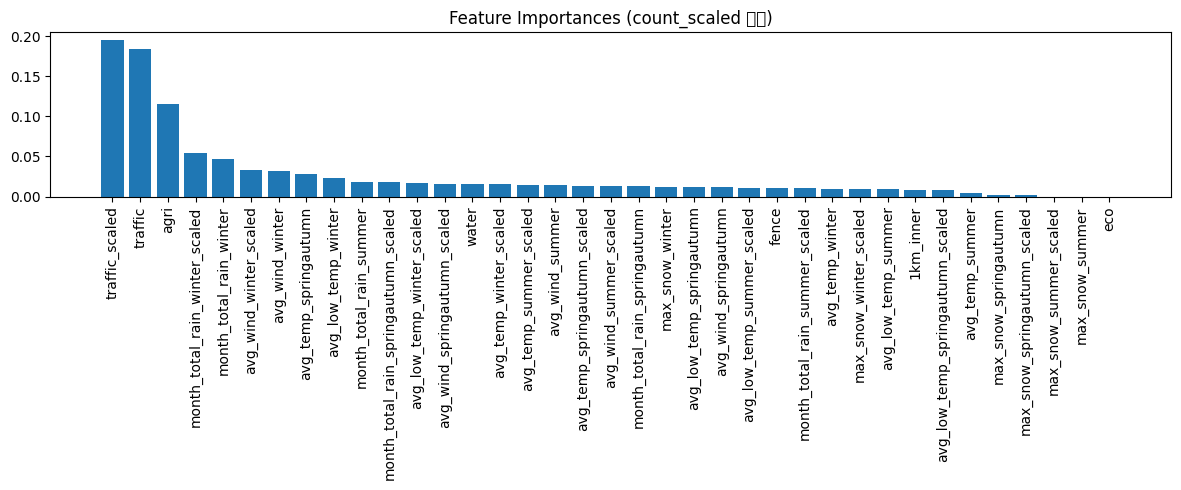

In [29]:
# --------------------------------------------
# 1. 라이브러리 import
# --------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------
# 2. 데이터 불러오기
# --------------------------------------------
# 지우가 정해준 경로 사용!
df = pd.read_csv("data/post_1km_robust scaling_0714.csv")

# --------------------------------------------
# 3. count > 0 구간만 추출
# --------------------------------------------
df_nonzero = df[df["count"] > 0]

print("발생 구간 데이터 shape:", df_nonzero.shape)
print(df_nonzero["count"].describe())

# --------------------------------------------
# 4. Feature / Target 분리
# --------------------------------------------

# feature에서 count, post_group, year, count_scaled 제거
cols_to_drop = ["count", "post_group", "year", "count_scaled"]
cols_to_drop = [col for col in cols_to_drop if col in df_nonzero.columns]

X = df_nonzero.drop(columns=cols_to_drop)
y = df_nonzero["count"]

print("Feature shape:", X.shape)

# --------------------------------------------
# 5. K-Fold 설정
# --------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# RMSE scorer 정의
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --------------------------------------------
# 6. Random Forest + k-fold
# --------------------------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(model, X, y, scoring=rmse_scorer, cv=kf)

print("🔎 Fold별 RMSE:", -scores)
print("🔎 평균 RMSE:", -scores.mean())

# --------------------------------------------
# 7. 최종 학습 & Feature Importance
# --------------------------------------------
# 전체 데이터로 학습
model.fit(X, y)

# Feature Importances 추출
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 5))
plt.title("Feature Importances (count_scaled 제외)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

✅ target 분포:
 target
0    2100
1      90
Name: count, dtype: int64
✅ Feature shape: (2190, 37)
✅ train target 분포:
 target
0    1680
1      72
Name: count, dtype: int64
✅ SMOTE 후 분포:
 target
1    1680
0    1680
Name: count, dtype: int64

✅ Classification Report

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       420
           1       0.02      0.06      0.03        18

    accuracy                           0.86       438
   macro avg       0.49      0.47      0.48       438
weighted avg       0.92      0.86      0.89       438


✅ Confusion Matrix

[[374  46]
 [ 17   1]]


C:\Users\user\AppData\Local\Temp\ipykernel_5640\1680979030.py:80: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_5640\1680979030.py:80: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


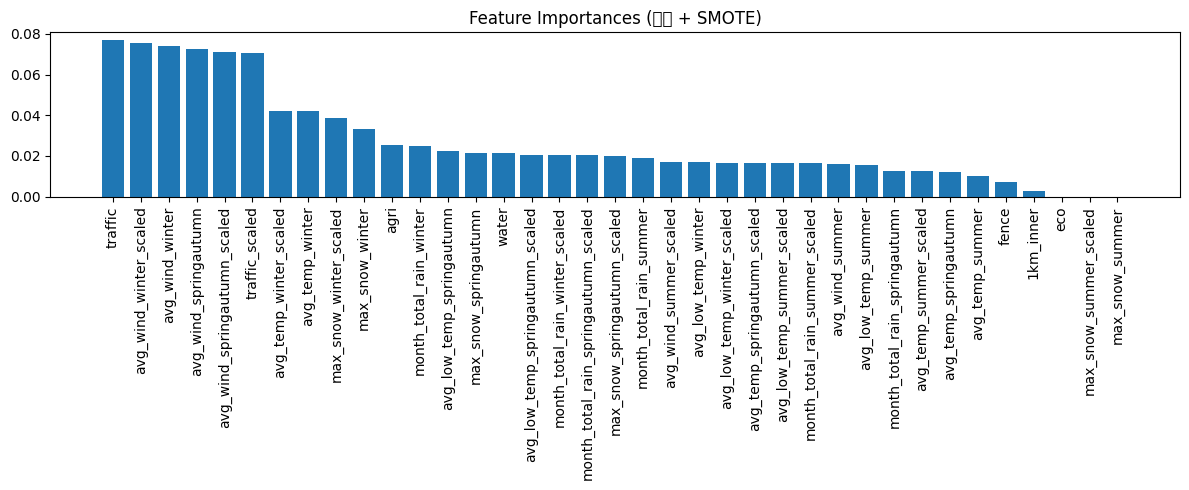

In [31]:
# --------------------------------------------
# 1. 라이브러리 import
# --------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------
# 2. 데이터 불러오기
# --------------------------------------------
# 지우가 지정한 경로
df = pd.read_csv("data/post_1km_robust scaling_0714.csv")

# --------------------------------------------
# 3. target 컬럼 생성 (발생 여부)
# --------------------------------------------
df["target"] = (df["count"] > 0).astype(int)

print("✅ target 분포:\n", df["target"].value_counts())

# --------------------------------------------
# 4. Feature / Target 분리
# --------------------------------------------
cols_to_drop = ["count", "post_group", "year", "count_scaled", "target"]
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

X = df.drop(columns=cols_to_drop)
y = df["target"]

print("✅ Feature shape:", X.shape)

# --------------------------------------------
# 5. train-test split
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ train target 분포:\n", y_train.value_counts())

# --------------------------------------------
# 6. SMOTE 오버샘플링
# --------------------------------------------
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("✅ SMOTE 후 분포:\n", y_res.value_counts())

# --------------------------------------------
# 7. Random Forest 학습
# --------------------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_res, y_res)

# --------------------------------------------
# 8. 예측 및 평가
# --------------------------------------------
y_pred = model.predict(X_test)

print("\n✅ Classification Report\n")
print(classification_report(y_test, y_pred))

print("\n✅ Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

# --------------------------------------------
# 9. Feature Importance Plot
# --------------------------------------------
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 5))
plt.title("Feature Importances (분류 + SMOTE)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()